<a href="https://colab.research.google.com/github/NovalYsf01/Artificial_Intellegence/blob/main/Artificial_intellegence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Noval Yusuf Alfian**

**NIM: 20220801229**




Saving Pengunjung_Mall.csv to Pengunjung_Mall (1).csv
Data yang diunggah:
   ID_Pelanggan  Gender  Usia  Pendapatan_Tahunan_Ribuan_USD  Pengeluaran_USD
0             1    Pria    19                             15               39
1             2    Pria    21                             15               81
2             3  Wanita    20                             16                6
3             4  Wanita    23                             16               77
4             5  Wanita    31                             17               40
Contoh Dataset:
   Usia  Pengeluaran_USD
0    18            60.00
1    19            39.75
2    20            40.20
3    21            66.80
4    22            70.00
Cross-validated MSE: 797.6811142941682

Hasil Prediksi:
    Usia  Pengeluaran Aktual  Pengeluaran Prediksi
43    63           47.000000             37.022548
40    58           15.000000             36.255559
46    66           49.000000             37.957324
12    30           80.285714    

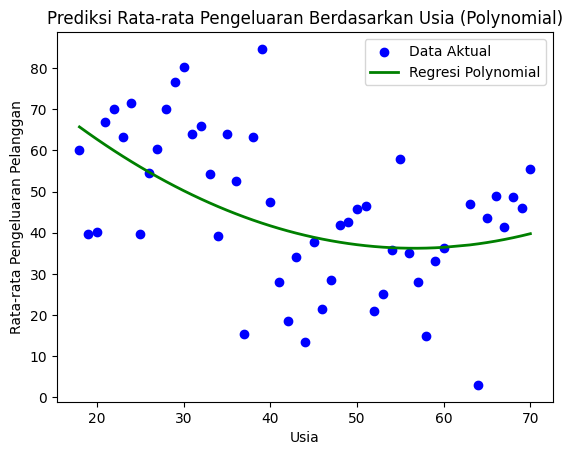

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import io
from google.colab import files  # Tambahkan ini

# Mengunggah file dari komputer lokal
uploaded = files.upload()

# Membaca file CSV yang baru diunggah
file_name = list(uploaded.keys())[0]  # Nama file yang diunggah
data = pd.read_csv(io.BytesIO(uploaded[file_name]))  # Membaca file CSV

print("Data yang diunggah:")
print(data.head())

# 2. Membuat DataFrame Berdasarkan Usia dan Rata-rata Pengeluaran
df_avg = data.groupby('Usia').agg({'Pengeluaran_USD': 'mean'}).reset_index()
print("Contoh Dataset:")
print(df_avg.head())

# 3. Persiapan Data untuk Model
X = df_avg[['Usia']]
y = df_avg['Pengeluaran_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Regresi Polinomial
poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)

# 5. Prediksi dan Evaluasi
y_poly_pred = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

# 6. Cross-Validation
cv_mse = -cross_val_score(poly_model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Cross-validated MSE: {cv_mse}")

# Menampilkan hasil prediksi
print("\nHasil Prediksi:")
print(pd.DataFrame({'Usia': X_test['Usia'], 'Pengeluaran Aktual': y_test, 'Pengeluaran Prediksi': y_poly_pred}))

# MSE dan R-squared
print(f"\nPolynomial Mean Squared Error (MSE): {mse_poly}")
print(f"Polynomial R-squared: {r2_poly}")

# 7. Visualisasi Hasil
plt.scatter(X, y, color='blue', label='Data Aktual')
plt.plot(X, poly_model.predict(X), color='green', linewidth=2, label='Regresi Polynomial')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Pengeluaran Pelanggan')
plt.title('Prediksi Rata-rata Pengeluaran Berdasarkan Usia (Polynomial)')
plt.legend()
plt.show()
